# Part ① Data cleaning
## Table of contents
- <a href="#C0">0. Importing libraries</a>
- <a href="#C1">1. General overview</a>
- <a href="#C2">2. Visualization of missing data </a>
- <a href="#C3">3. Application idea and first features selection</a>
- <a href="#C4">4. Duplicates removal</a>
- <a href="#C5">5. Comparison and treatment of each selected feature group</a>
  - <a href="#C5.1">5.1 Time</a>
  - <a href="#C5.2">5.2 Countries</a>
  - <a href="#C5.3">5.3 Categories</a>
  - <a href="#C5.4">5.4 Energy and nutriments</a>
  - <a href="#C5.5">5.5 Products names</a>
- <a href="#C6">6. Nutrigrade by KNN</a>

# <a name="C0">0. Importing python libraries</a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib as mpl
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)
import timeit

In [3]:
pd.set_option('display.max_columns', None) # to show all columns
# pd.reset_option(“max_columns”) # to go back to default columns display
pd.set_option('display.max_rows', None) # to show all rows
# pd.reset_option(“max_rows”) # to go back to default columns display

# <a name="C1">1. General overview</a>

## 1.1 Loading

In [4]:
df = pd.read_csv('products.csv', sep='\t')

/Users/victorbenard/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1.2 Header

In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

## 1.3 Dataframe size

In [6]:
df.shape

(320772, 162)

<div class="alert alert-block alert-info">
<b>Remarque</b> <br>
<hr>
Le dataframe comporte 320772 individus, et 162 variables
</div>

## 1.4 Elementary statistics

In [7]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

## 1.5 Features types

In [8]:
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

<div class="alert alert-block alert-info">
<b>Remark</b> <br>
<hr>
Type linked to each time-related feature isn't correct and will thereafter be corrected.
</div>

# <a name="C2">2. Visualization of missing data</a>

<div class="alert alert-block alert-warning">
<b>Objectives</b>
<hr>
    <li>Determine the proportion of missing data in the complete dataframe</li>
    <li>Visualize them</li>
    <li>Rank features by filling comprehensiveness</li>
</div>

In [9]:
# Missing data in dataframe
nb_nan = df.isna().sum().sum()

# Dataframe size
size_df = df.shape[0]*df.shape[1]

# Proportion of missing data
prop_missing = nb_nan / size_df

print("The proportion of missing data in the dataframe is {0:.2f}%.".format(prop_missing*100))

The proportion of missing data in the dataframe is 76.22%.


<div class="alert alert-block alert-info">
Missing data is thereafter visualized through the missingno toolbox.
</div>

In [11]:
# Separating the dataframe in 4 for clarity
df11 = df[df.columns[0:40]]
df12 = df[df.columns[41:80]]
df13 = df[df.columns[81:120]]
df14 = df[df.columns[121:162]]

# Display missingno
for i in [df11, df12, df13, df14]:
    msno.matrix(i, labels=True, fontsize=16)

<div class="alert alert-block alert-info">
<b>Remarks</b>
<hr>
<ul>
<li>1 columns out of 2 is empty, or includes an unsignificant quantity of data</li>
<li>A vast majority of columns are incomplete</li>
<li>First columns (code, created time, ...) are fully filled</li>
</ul>
</div>

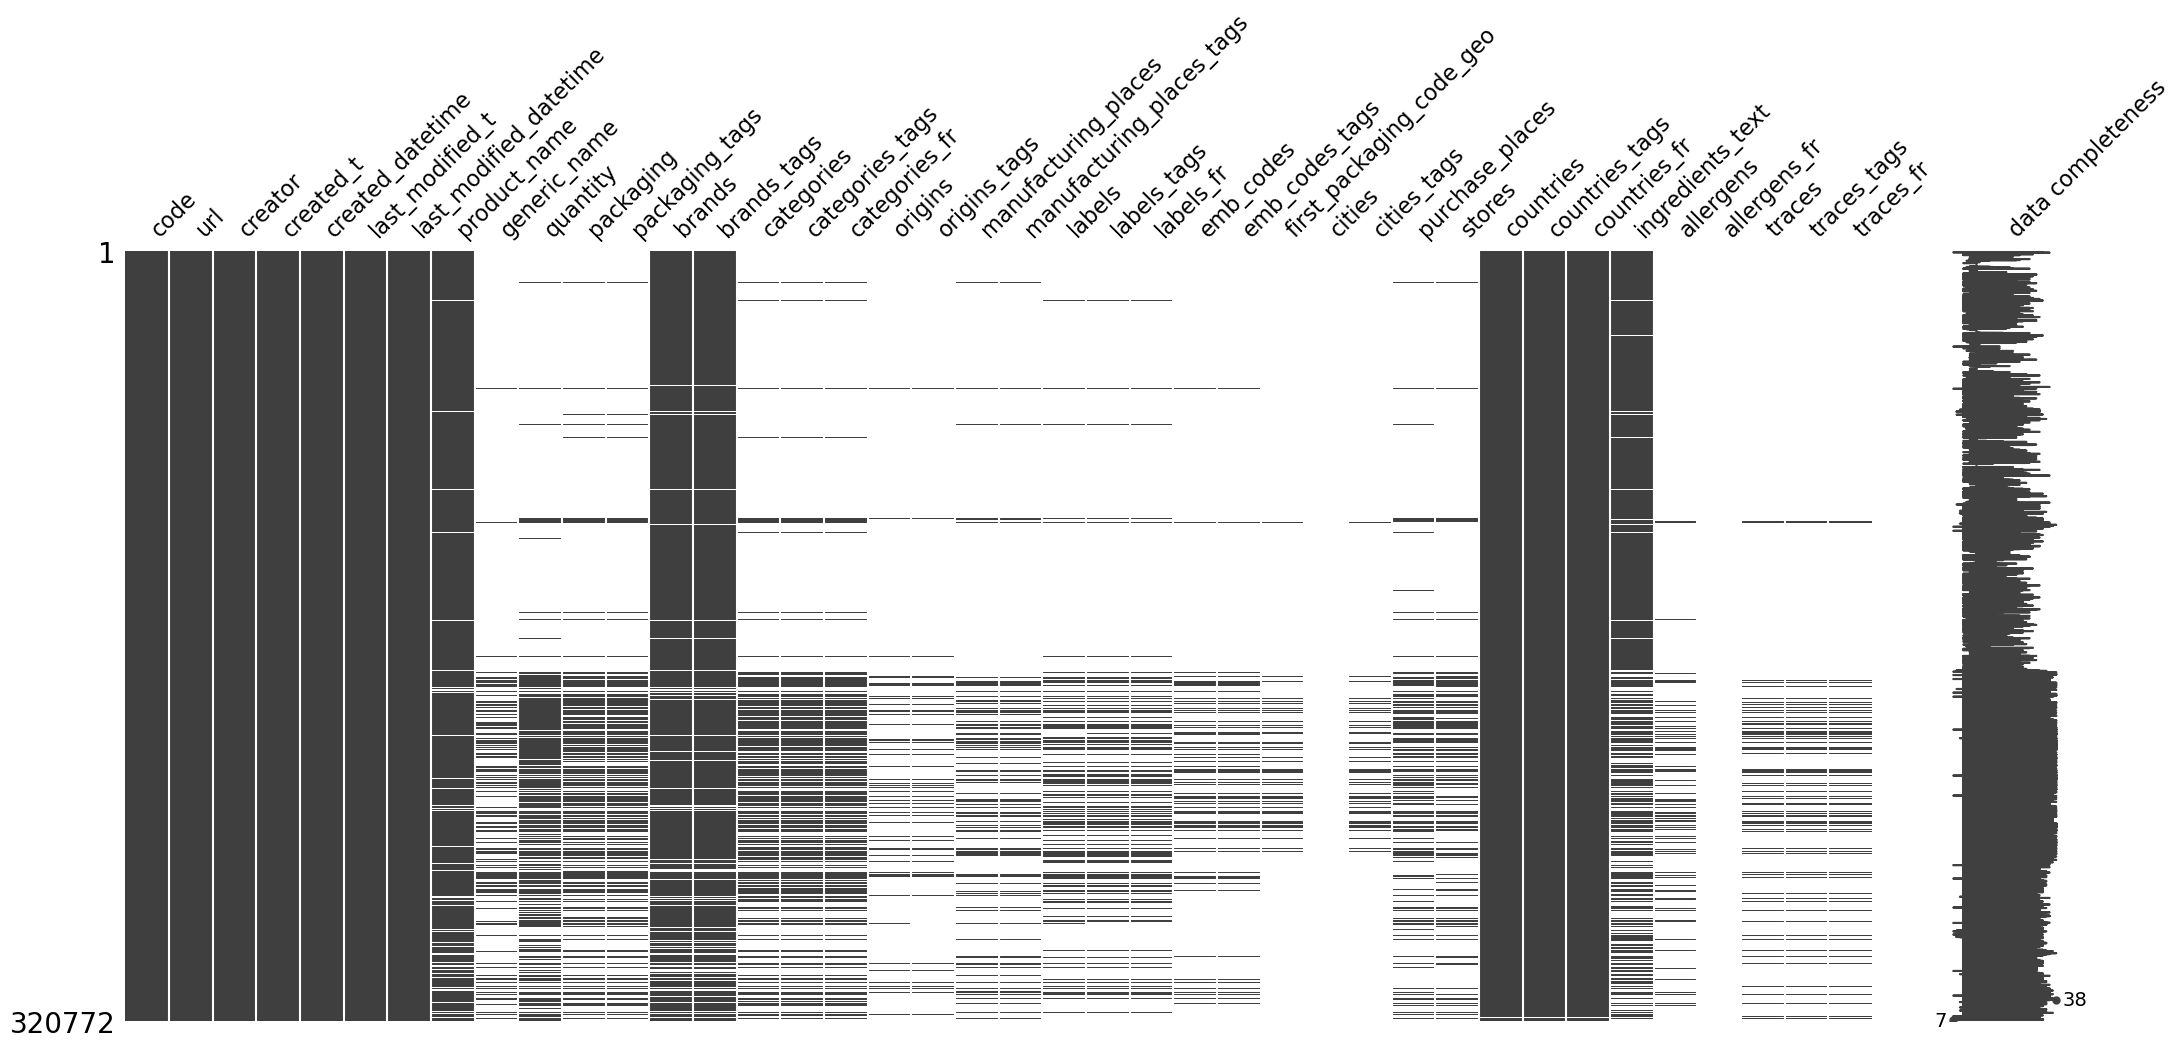

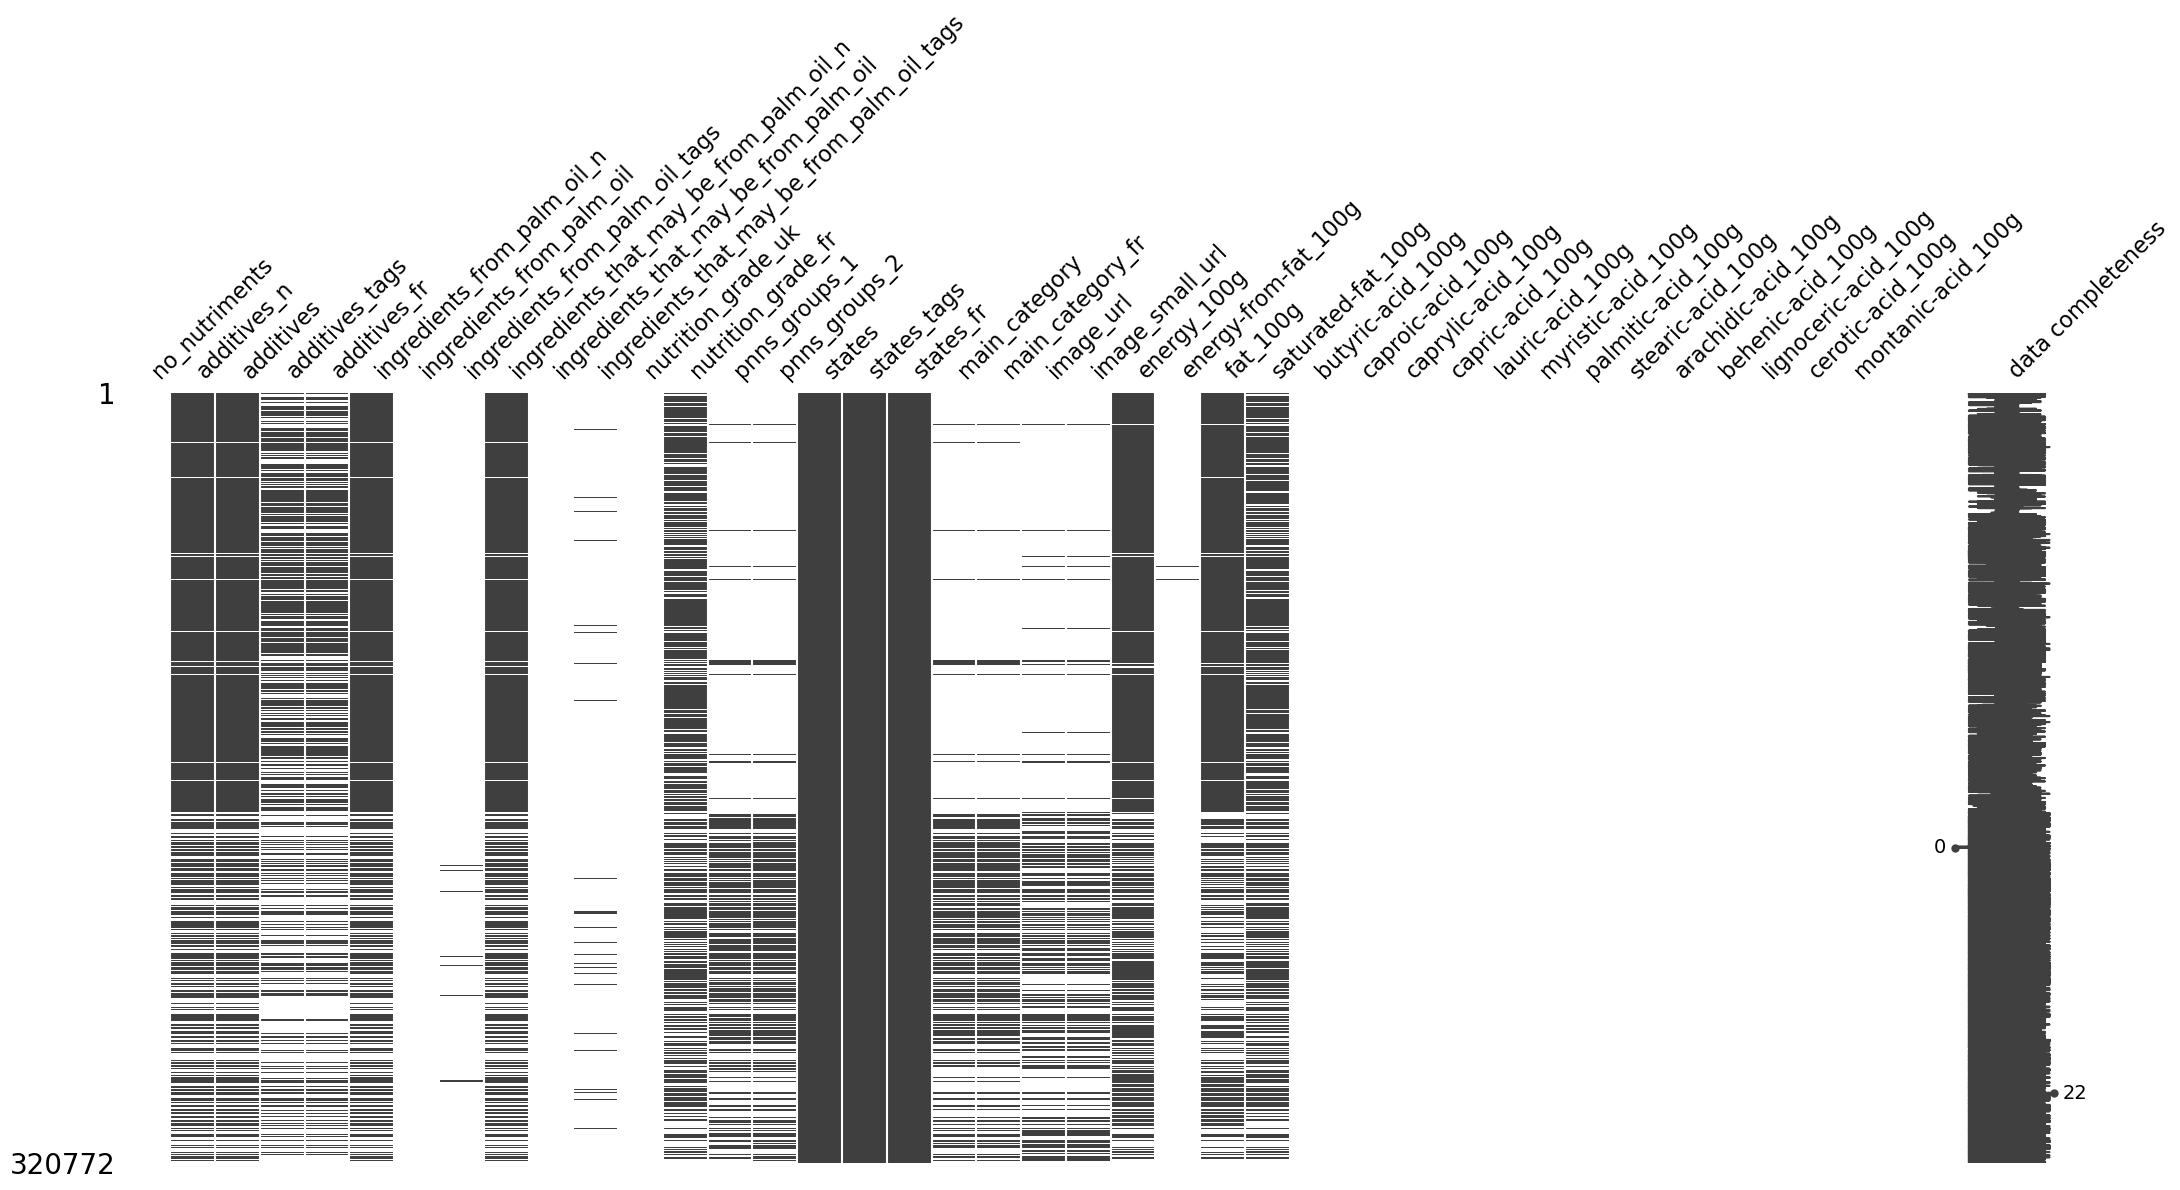

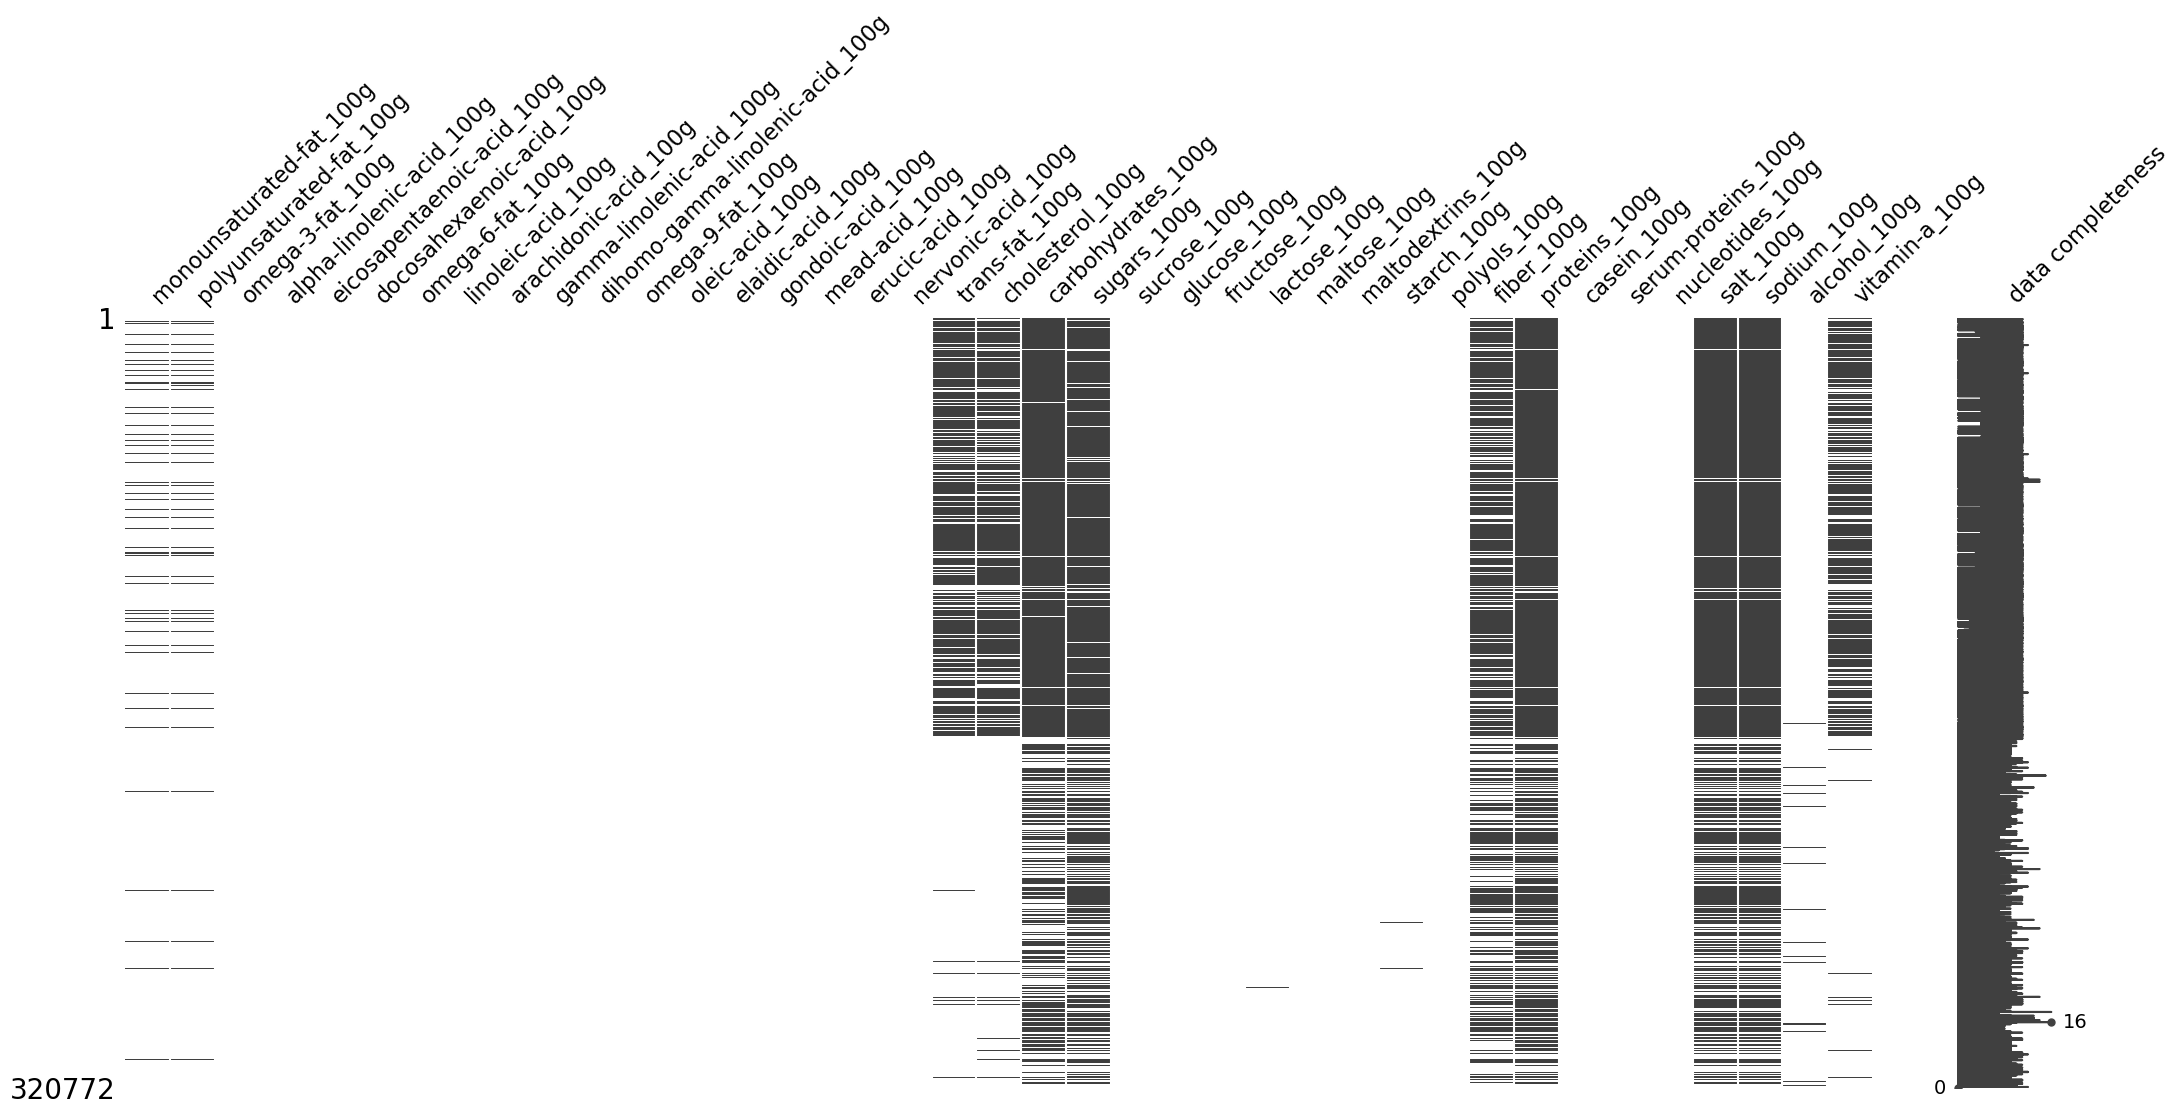

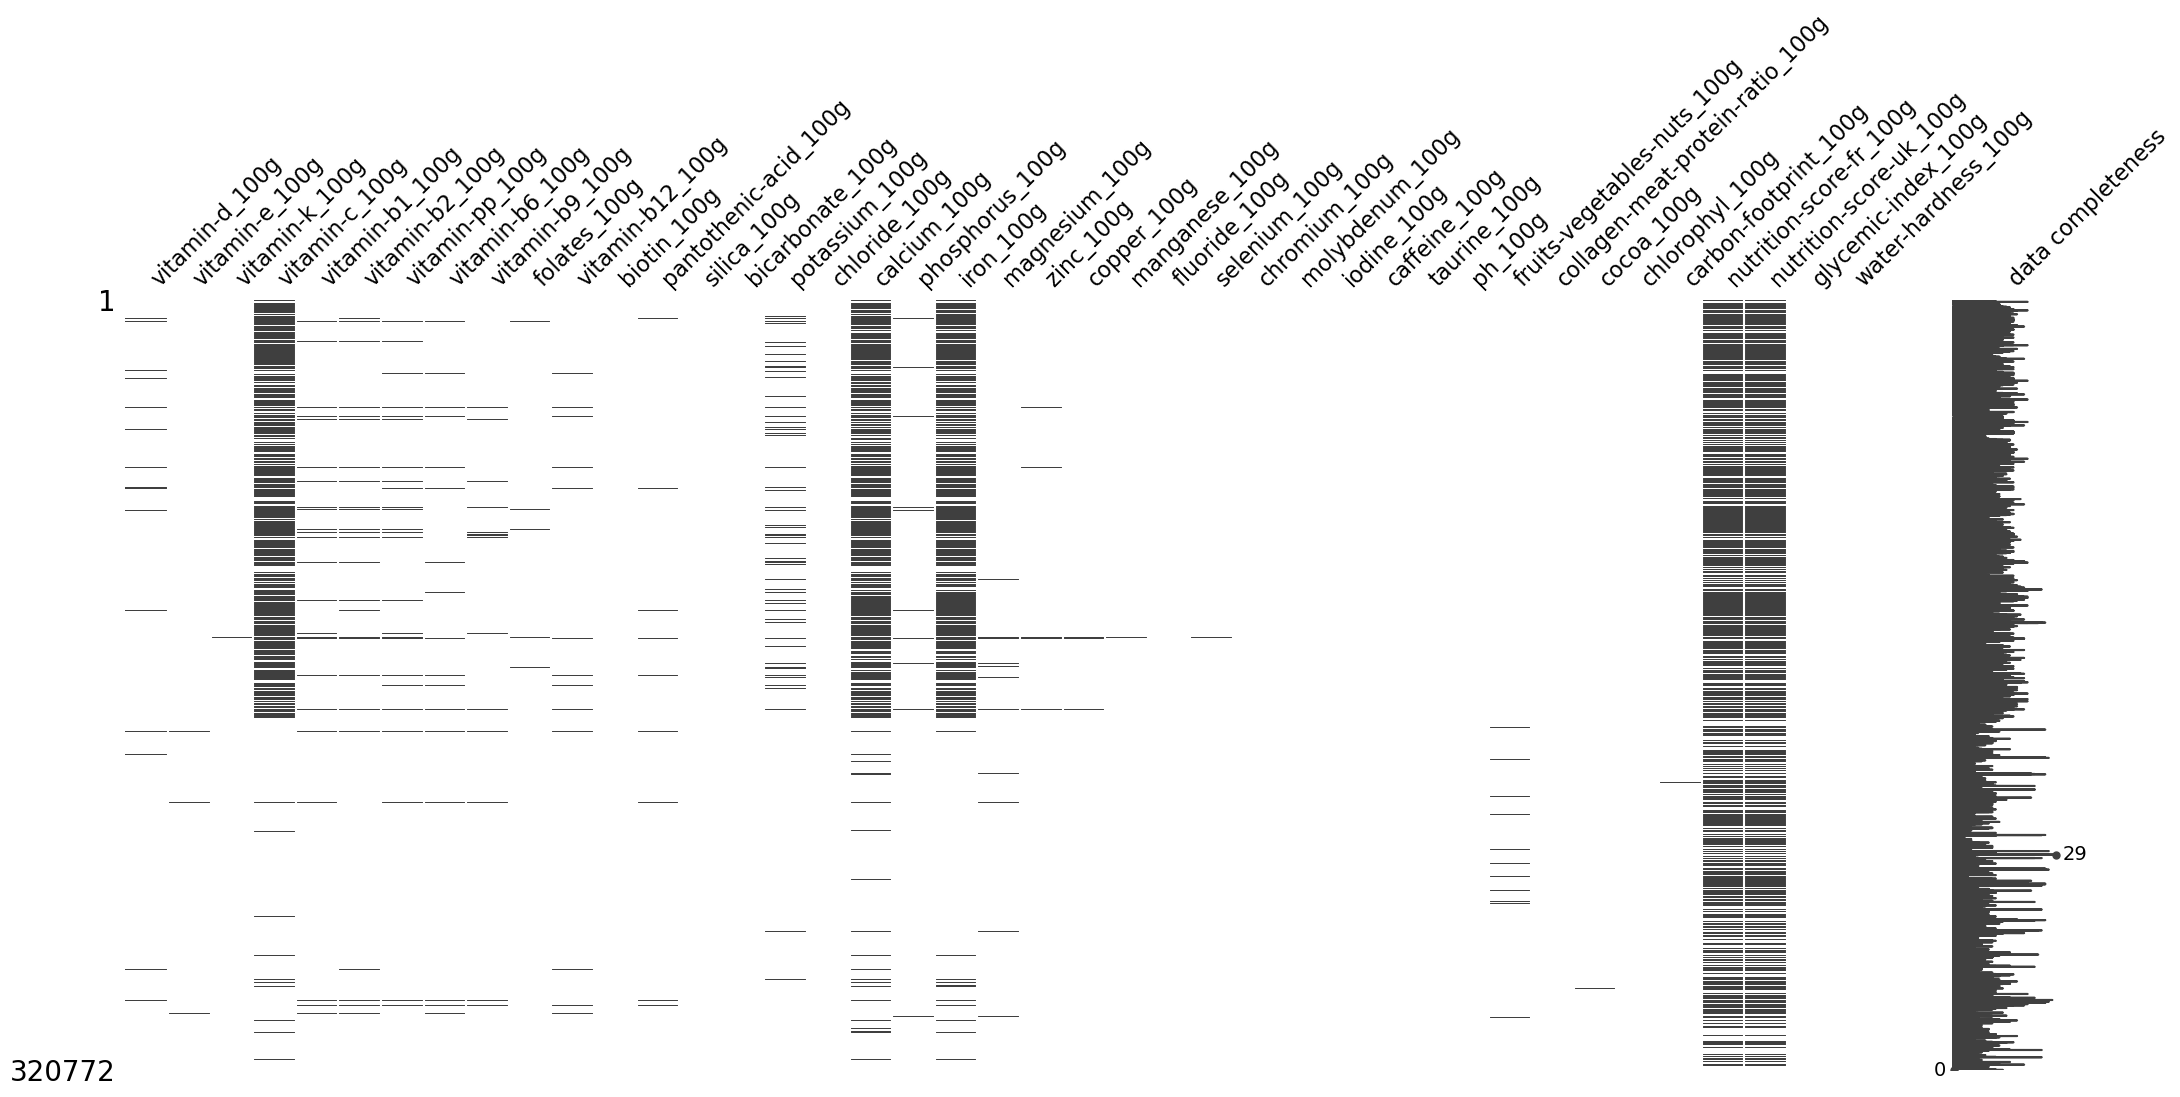

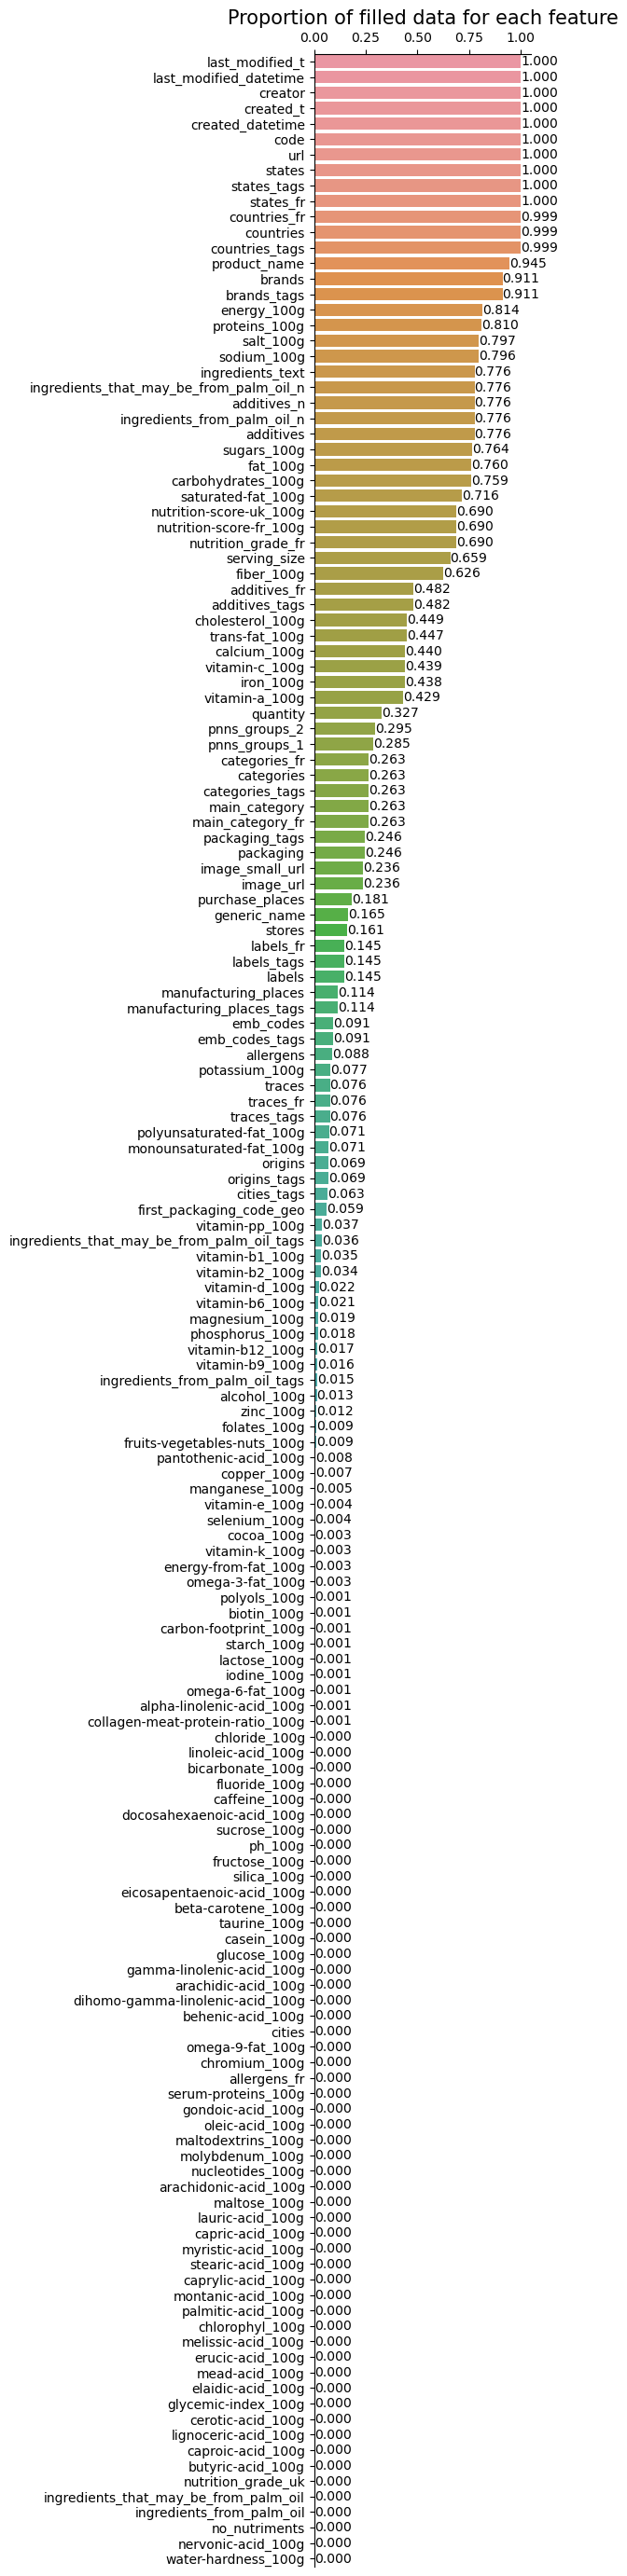

In [12]:
# Calculating the proportion of filled data for each feature
actually_filled = 1-df.isna().mean().sort_values()

plt.figure(figsize=(3, 35))
ax = sns.barplot(y=actually_filled.index,
                 x=actually_filled.values)

container = ax.containers[0]
ax.bar_label(container,
             labels=[f'{x:.3f}' for x in container.datavalues])
#ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.tick_top()
plt.title('Proportion of filled data for each feature', fontsize=15)
plt.savefig('proportion1.png', transparent=True, bbox_inches='tight')
ax
plt.show()

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
3/4th of the dataframe are NaN, 1 column out of 2 is empty or includes a negligeable quantity of data, but the first columns that are the most critical are full.<br>
Selection of relevant features will be carried out.
</div>

# <a name="C3">3. Application idea and first features selection</a>

<div class="alert alert-block alert-warning">
<b>Application idea</b>
<hr>
Determine meals with an estimation of the best french Nutrigrade score possible.
So that the application can work correctly, it is necessary to determine nutriscores of each product.

<div class="alert alert-block alert-info">

A first feature selection is carried out, by analyzing them by order of filling<br>\
Non-mentioned features are not relevant and will be deleted.
    
|Features|Action|
|:---:|:---:|
|last_modified_t, last_modified_datetime|<font color='red'>Delete</font>|   
|creator|<font color='red'>Delete</font>|  
|created_t, created_datetime|Compare and keep 1|    
|code|<font color='green'>Keep</font>|  
|url|<font color='red'>Delete</font>|  
|states, states_tags, states_fr|<font color='red'>Delete</font>|    
|countries_tags, countries_fr, countries|Compare and keep 1|  
|product_name|<font color='green'>Keep</font>|  
|brands, brands_tags|<font color='red'>Delete</font>| 
|energy_100g|<font color='green'>Keep</font>|
|proteins_100g, sugars_100g, fat_100g,<br> carbohydrates_100g, saturated-fat_100g, fiber_100g, <br>salt_100g, sodium_100g, fruits-vegetables-nuts_100g|<font color='green'>Keep</font>| 
|cholesterol_100g, trans-fat_100g|<font color='red'>Delete</font>|
|ingredients_text|<font color='red'>Delete</font>|
|ingredients_that_may_be_from_palm_oil_n, <br>ingredients_from_palm_oil_n|<font color='red'>Delete</font>|
|additives_n, additives, additives_fr, additives_tags|<font color='red'>Delete</font>|
|nutrition-score-fr_100g, <br>nutrition_grade_fr|Compare and keep 1|
|nutrition-score-uk_100g|<font color='red'>Delete</font>
|serving_size|<font color='red'>Delete</font>|
|calcium_100g, vitamin-c_100g, iron_100g, <br>vitamin-a_100g, potassium_100g, vitamin-b1_100g, <br>vitamin-d_100g, magnesium_100g, phosphorus_100g, <br>vitamin-b12_100g, zinc_100g, copper_100g, <br>selenium_100g, iodine_100g|<font color='red'>Delete</font>|
|quantity|<font color='red'>Delete</font>|
|pnns_groups_1, pnns_groups_2, categories_fr, <br>categories, categories_tags, main_category, <br>main_category_fr|Compare and keep 1|
    
</div>

In [13]:
df = df[['created_t', 'created_datetime','code','countries_tags','countries_fr','countries',
         'product_name','energy_100g','proteins_100g','sugars_100g','fat_100g',
         'carbohydrates_100g','saturated-fat_100g','fiber_100g',
         'salt_100g','sodium_100g','fruits-vegetables-nuts_100g',
         'nutrition-score-fr_100g','nutrition_grade_fr',
         'pnns_groups_1','pnns_groups_2','categories_fr','categories',
         'categories_tags','main_category','main_category_fr']]

In [14]:
df.shape

(320772, 26)

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>

Firstly, dataframe size is reduced from (320772, 162) to (320772, 26).<br>
Features that are kept are the following.<br><br>
    
**Qualitative features**
    <li>code</li>
    <li>countries_tags, countries_fr, countries</li>
    <li>product_name</li>
    <li>nutrition_grade_fr</li>
    <li>pnns_groups_1, pnns_groups_2, categories_fr,
categories, categories_tags, main_category,
main_category_fr</li><br>

**Quantitative/Numerical features**
    <li>created_t, created_datetime</li>
    <li>energy_100g</li>
    <li>proteins_100g, sugars_100g, fat_100g, carbohydrates_100g, saturated-fat_100g, fiber_100g, salt_100g, sodium_100g.</li>
    <li>nutrition-score-uk_100g, nutrition-score-fr_100g</li>

</div>

# <a name="C4">4. Duplicates removal</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
Use one or several variables in order to count duplicates, and consequently delete them.
</div>

In [15]:
# Missing data for 'code' feature
prop_missing = df['code'].isna().sum().sum()
prop_missing

23

<div class="alert alert-block alert-info">

The feature 'code' can be used as a primary key if it contains few duplicates, as its filling proportion is 1.000

</div>

In [16]:
df.duplicated('code').sum()

133

<div class="alert alert-block alert-info">

Number of duplicats for 'code' is indeed very low.<br>
Rows will be sorted based on missing data, and rows containing more NaN will be deleted.
    
</div>

In [17]:
# Counting number of missing values per row
df['NB_NAN'] = df.isna().sum(axis=1)

# Sorting rows absed on missing data
df = df.sort_values('NB_NAN')

# Deleting duplicates while keeping versions with less NaN
df = df.drop_duplicates('code', keep='first')

# Removing the now useless column
df = df.drop('NB_NAN', axis=1)

<div class="alert alert-block alert-info">

Along the way, rows with no code are dropped.

</div>

In [18]:
df = df[df['code'].notna()]

In [19]:
df.shape

(320638, 26)

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
The 'code' feature leads to the deletion of 133 duplicates.<br>
</div>

# <a name="C5">5. Comparison and treatment of each selected feature group</a>

## <a name="C5.1">5.1 Time</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
It is interesting to keep one temporal feature to analyze score evolution along time.<br>
Features are therefore compared, and the most relevant one kept.
</div>

<div class="alert alert-block alert-info">

Firstlye, format of time-related variables is converted<br>
Then, values that are non-common to both features are listed.
    
</div>

In [20]:
# Convertion to a common format
df['created_t'] = pd.to_datetime(df['created_t'], unit='s', errors='coerce')
df['created_datetime'] = pd.to_datetime(df['created_datetime'], errors='coerce').dt.tz_localize(None)

# Showing differences
df.loc[~(df['created_t'] == df['created_datetime'])]

,created_t,created_datetime,code,countries_tags,countries_fr,countries,product_name,energy_100g,proteins_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,categories_fr,categories,categories_tags,main_category,main_category_fr
187478,1970-01-01,NaT,3017760038409,"en:france,en:switzerland","France,Suisse","France,Suisse",Lulu la barquette (Fraise),1480.0,4.2,60.0,2.1,78.0,0.5,1.2,0.08,0.031496,NaN,13.0,d,Sugary snacks,Biscuits and cakes,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:biscuits,Biscuits


In [21]:
df[['created_t','created_datetime']].describe(datetime_is_numeric=True)

,created_t,created_datetime
count,320638,320637
mean,2016-08-08 00:54:54.819849984,2016-08-08 02:11:21.370044928
min,1970-01-01 00:00:00,2012-01-31 14:43:58
25%,2016-05-11 11:52:44.249999872,2016-05-11 11:56:42
50%,2017-03-09 11:13:56,2017-03-09 11:13:56
75%,2017-03-09 16:57:29,2017-03-09 16:57:29
max,2017-04-21 01:15:03,2017-04-21 01:15:03


<div class="alert alert-block alert-info">

Features 'created_datetime' et 'created_t' are equal, except for one value of 'created_t'.<br>
It is therefore 'created_datetime' that will be used.<br>
Rows containing NaT will now be dropped, at the same time as the 'created_t' feature.

</div>

In [22]:
df = df[df['created_datetime'].notna()]

df.drop('created_t', axis=1, inplace=True)

In [23]:
df.shape

(320637, 25)

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
Selected time feature is 'created_datetime'.<br>
Feature 'created_t' is deleted.<br>
</div>

## <a name="C5.2">5.2 Countries</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
Topic is nutriscore in France. Therefore, only data concerning France must be kept.<br>
Firstly, a comparison is carried out between features related to countires, so that the one can be selected to sort countires.<br>
</div>

In [24]:
for i in ['countries_tags', 'countries_fr', 'countries']:
    print(f'In {i}, there are {df[i].value_counts().count()} different values, and {df[i].isna().sum()} NaN.')

In countries_tags, there are 719 different values, and 280 NaN.
In countries_fr, there are 717 different values, and 280 NaN.
In countries, there are 1428 different values, and 280 NaN.


<div class="alert alert-block alert-info">

The 3 features have the same NaN proportion, but 'countries_tags' seems to be a relevant choice, given the fact that it contains fewer different tags, and is written in english.<br> However the number of tags is still too large: there can't be 717 different countries.<br> Most cited countries are visualized thereafter.
</div>

In [25]:
df['countries_tags'].value_counts().loc[lambda x : x>1000]

en:united-states            172905
en:france                    94383
en:switzerland               14953
en:germany                    7870
en:spain                      5009
en:united-kingdom             4823
en:belgium                    2594
en:australia                  2056
en:russia                     1315
en:france,en:switzerland      1223
en:italy                      1212
Name: countries_tags, dtype: int64

<div class="alert alert-block alert-info">

It can be seen that the 10th country is in reality a combination of 2 countries.<br>
To counter this issue, in case of several listed countries per row, only the first one will be considered.


</div>

In [26]:
def format_countries(country):
    country = str(country).split(',')[0].replace('en:', '').replace('fr:', '')
    return country

In [27]:
df['countries_tags'] = df['countries_tags'].apply(format_countries)

In [28]:
df['countries_tags'].value_counts().france

97435

<div class="alert alert-block alert-info">

The count for 'France' value has been increasded by 3k (from 94k to 97k), due to the fact that values containing several countries have been considered.<br>
Only remaining task is to delete rows that do not contain the 'france' tag, then the 3 features related to countries.

</div>

In [29]:
df = df[df.countries_tags.str.contains("france")]
df.drop(['countries_tags', 'countries_fr', 'countries'], axis=1, inplace=True)
df.shape

(97435, 22)

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
Only rows concerning France have been kept. Sorting has been done through the feature 'countries_tag'<br>
Following variables have been deleted: 'countries_tags', 'countries_fr', 'countries'.<br>
The number of rows is significantly reduced: from 321k to 97k.
</div>

## <a name="C5.3">5.3 Categories</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
With the intention of calcualting the nutriscore and nutrigrade, it is interesting to distinguish food categories.
</div>

In [30]:
for i in ['pnns_groups_1','pnns_groups_2','categories_fr'
    ,'categories','categories_tags','main_category','main_category_fr']:
    print(f'In {i}, there are {df[i].value_counts().count()} different values, and {df[i].isna().sum()} NaN.')

In pnns_groups_1, there are 13 different values, and 33433 NaN.
In pnns_groups_2, there are 41 different values, and 31339 NaN.
In categories_fr, there are 15456 different values, and 36393 NaN.
In categories, there are 26343 different values, and 36393 NaN.
In categories_tags, there are 15456 different values, and 36393 NaN.
In main_category, there are 1588 different values, and 36393 NaN.
In main_category_fr, there are 1588 different values, and 36393 NaN.


In [31]:
df['pnns_groups_1'].value_counts()

unknown                    12389
Sugary snacks               9177
Fish Meat Eggs              6739
Beverages                   6440
Milk and dairy products     6321
Cereals and potatoes        6019
Composite foods             6019
Fruits and vegetables       4063
Fat and sauces              3740
Salty snacks                2077
fruits-and-vegetables        547
sugary-snacks                469
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

<div class="alert alert-block alert-info">

'pnns_groups_1' feature contains fewer different categories and will therefore be kept.<br>
Others will be dropped<br>
'pnns_groups_1' values that represent the same thing will also be regrouped.
    
</div>

In [32]:
df.drop(['categories_fr','categories','categories_tags',
         'main_category','main_category_fr','pnns_groups_2'], axis=1, inplace=True)

In [33]:
df['pnns_groups_1'].replace({'fruits-and-vegetables': 'Fruits and vegetables',
                             'sugary-snacks': 'Sugary snacks',
                             'cereals-and-potatoes':'Cereals and potatoes', np.nan:'unknown'}, inplace = True)

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
Different categories of food are accessible under the column 'pnns_groups_1'.
</div>

## <a name="C5.4">5.4 Energy and nutriments</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
These variables are necessary to the application. Outliers must be deleted, and NaN must be handled.
</div>

|Variables|
|:---|
|energy_100g, proteins_100g, salt_100g, sodium_100g, sugars_100g, fat_100g, carbohydrates_100g, saturated-fat_100g, fiber_100g|


### 5.4.1 Energy

In [34]:
df['energy_100g'].describe()

count    6.383700e+04
mean     1.169964e+03
std      1.291136e+04
min      0.000000e+00
25%      4.270000e+02
50%      1.033000e+03
75%      1.645000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

<div class="alert alert-block alert-info">
    
There can't be more than 3700kJ per 100g (higher limit for fat content).
    
</div>

In [35]:
df.loc[df['energy_100g']>3700, 'energy_100g'] = df['energy_100g'].median()

### 5.4.2 Nutriments

In [36]:
# Nutriments
df[['proteins_100g','salt_100g','sugars_100g','fat_100g','carbohydrates_100g',
   'saturated-fat_100g','fiber_100g','fruits-vegetables-nuts_100g','sodium_100g']].describe()

,proteins_100g,salt_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,fruits-vegetables-nuts_100g,sodium_100g
count,63566.000000,61839.000000,61782.000000,46888.000000,46461.000000,61647.000000,45232.000000,2957.000000,61836.000000
mean,7.767911,1.161789,13.375654,13.295477,27.637631,5.404953,2.545454,31.456500,0.457418
std,7.906710,4.306369,19.074322,16.935720,27.381451,8.526841,4.630524,32.031471,1.695402
min,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800000,0.080000,1.000000,1.300000,4.000000,0.300000,0.000000,0.000000,0.031496
50%,6.000000,0.560000,4.000000,6.800000,14.400000,1.900000,1.300000,23.000000,0.220472
75%,11.000000,1.244800,17.400000,21.000000,53.000000,7.400000,3.200000,51.000000,0.490618
max,100.000000,211.000000,105.000000,380.000000,190.000000,210.000000,178.000000,100.000000,83.000000


<div class="alert alert-block alert-info">

Some values are negative, and others are over 100g.<br>
In order to get rid of outliers, values that are not compr
Dans le but de supprimer les outliers, les valeurs that are not between 0 and 100 are replaced.

</div>

In [37]:
for i in ['proteins_100g','salt_100g','sugars_100g','fat_100g','carbohydrates_100g',
   'saturated-fat_100g','fiber_100g','fruits-vegetables-nuts_100g','sodium_100g']:
    df.loc[df[i]<0, i] = 0
    df.loc[df[i]>100, i] = np.NaN

## 'Salt' ou 'Sodium'

/Users/victorbenard/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


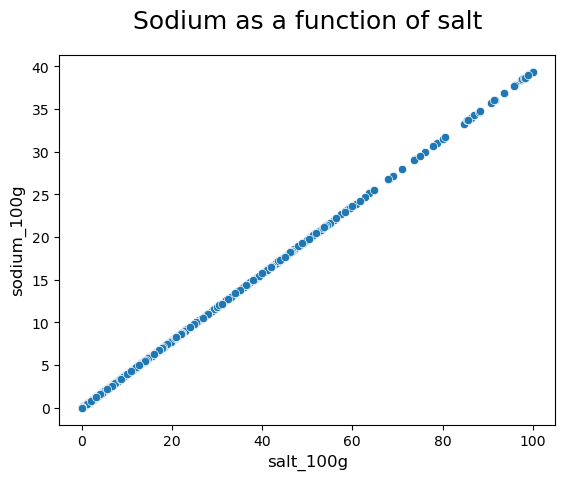

In [38]:
sns.scatterplot(df['salt_100g'], df['sodium_100g'])
plt.title('Sodium as a function of salt', fontsize=18, y=1.05)
plt.xlabel('salt_100g', fontsize=12)
plt.ylabel('sodium_100g', fontsize=12)
plt.savefig('salt-sodium.png', transparent=True, bbox_inches='tight')
plt.show()

In [39]:
for i in ['salt_100g','sodium_100g']:
    print(f'In {i}, there are  {df[i].isna().sum()} NaN.')

In salt_100g, there are  35598 NaN.
In sodium_100g, there are  35599 NaN.


<div class="alert alert-block alert-info">

'salt' and 'sodium' and linearily correlated, and have the same number of missing values. The 'sodium' feature is therefore deleted.

</div>

In [40]:
df.drop(['sodium_100g'], axis=1, inplace=True)

<div class="alert alert-block alert-info">

Rows where the total mass of nutriments is over 100g are also discarded.

</div>

In [41]:
#backup
df_copy1 = df.copy()

In [42]:
df = df_copy1.copy()

In [43]:
df['sum'] = df[['carbohydrates_100g','proteins_100g','fat_100g','fiber_100g']].sum(axis=1)
df = df.drop(df[df['sum'] > 100].index)
df.drop(['sum'], axis=1, inplace=True)
df.shape

(97112, 15)

<div class="alert alert-block alert-info">

Rows where too many NaN are present in critical variables to the calculation of nutriscore are deleted.

</div>

In [44]:
df20 = df[['energy_100g','sugars_100g','saturated-fat_100g','fruits-vegetables-nuts_100g',
'fiber_100g','proteins_100g','salt_100g','fat_100g','carbohydrates_100g']]

In [45]:
df['count'] = df20.apply(lambda x: x.count(), axis=1)

In [46]:
df['count'].value_counts()

0    32875
8    26225
6    17403
7    16011
9     1795
4     1529
1      711
5      403
3       91
2       69
Name: count, dtype: int64

In [47]:
df = df.drop(df[df['count'] < 6].index)
df.drop(['count'], axis=1, inplace=True)
df.shape

(61434, 15)

<div class="alert alert-block alert-info">

NaN of 'fiber_100g' can be replaced by 0, considering the fact that most foodstuffs do not contain fibre.

</div>

In [48]:
df['fiber_100g'].replace({np.nan:0}, inplace = True)

<div class="alert alert-block alert-info">

Other nutriments contain sufficiently few NaN so that NaN of each row be completed by the median value of the group to which they belong.

</div>

In [49]:
for i in ['energy_100g','sugars_100g','saturated-fat_100g','salt_100g',
          'fruits-vegetables-nuts_100g','proteins_100g','carbohydrates_100g','fat_100g']:
    df[i] = df.groupby(['pnns_groups_1'], sort=False)[i].apply(lambda x: x.fillna(x.median()))

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
Outliers of Energy, nutriments, vitamins and minerals have been deleted.<br>
NaN of fibres have been replaced by 0. Nan of other nutriments have been replaced by the median value of their category.<br>
1/3 of rows contained less than 5 values, out of 8. They have been discarded.
</div>

## <a name="C5.5">5.5 Product name</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
Ensure every row comports a product name.
</div>

In [50]:
# Number of unique products
df['product_name'].value_counts().count()

51191

In [51]:
# Percentage of unique products
prop_unique = df['product_name'].value_counts().count()/len(df['product_name'])
print("The proportion of names of unique products is {0:.2f}%.".format(prop_unique*100))

The proportion of names of unique products is 83.33%.


In [52]:
# Proportion of missing data for the feature 'product_name'
prop_missing = df['product_name'].isna().sum().sum() / len(df['product_name'])
print("The proporiton of missing data for the feature 'product_name' is {0:.2f}%.".format(prop_missing*100))

The proporiton of missing data for the feature 'product_name' is 0.58%.


<div class="alert alert-block alert-info">

Rows of products that are not names are deleted.

</div>

In [53]:
df = df[df['product_name'].notna()]

In [54]:
df.shape

(61078, 15)

<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
4 products out of 5 makes a unique apparition in the dataframe.<br>
Products that are not named were discarded.<br>
</div>

In [55]:
#backup
df_copy = df.copy()

In [56]:
df = df_copy.copy()

 # <a name="C6">6. Nutrigrade by KNN</a>

<div class="alert alert-block alert-warning">
<b>Objective</b>
<hr>
Use a KNN imputer to complete NaN of nutrigrade.
</div>

<div class="alert alert-block alert-info">

A one-hot encoding on categories of 'pnns_groups_1' and 'nutrition_grade_fr' is added in order to consider their values during imputation.
    
</div>

In [57]:
df[['1','2','3','4','5','6','7','8','9','10']] = pd.get_dummies(df['pnns_groups_1'])
df.shape

(61078, 25)

In [58]:
df[['a','b','c','d','e']] = pd.get_dummies(df['nutrition_grade_fr'])

In [59]:
A = df[['energy_100g','sugars_100g','saturated-fat_100g','salt_100g','fruits-vegetables-nuts_100g',
'fiber_100g','proteins_100g','1','2','3','4','5','6','7','8','9','carbohydrates_100g','fat_100g',
        'a','b','c','d','e','nutrition-score-fr_100g']]

imputer = KNNImputer(n_neighbors=2)
X = pd.DataFrame(imputer.fit_transform(A), columns = A.columns)

In [60]:
df['nutrition_grade_fr'] = df[['a','b','c','d','e']].idxmax(axis=1)

In [61]:
df[['energy_100g','sugars_100g','saturated-fat_100g','salt_100g','fruits-vegetables-nuts_100g',
'fiber_100g','proteins_100g','1','2','3','4','5','6','7','8','9','carbohydrates_100g','fat_100g',
        'a','b','c','d','e','nutrition-score-fr_100g']] = X.to_numpy()

In [62]:
df.describe()

,energy_100g,proteins_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,1,2,3,4,5,6,7,8,9,10,a,b,c,d,e
count,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000
mean,1101.117482,7.723335,13.219235,11.723449,25.804589,5.360208,1.808232,1.138952,17.604594,8.597416,0.072645,0.082665,0.084859,0.046351,0.076181,0.052981,0.083876,0.028750,0.122745,0.348947,0.164396,0.147074,0.211615,0.271178,0.187662
std,757.028682,7.813941,18.903827,14.418493,23.666832,8.444688,3.806994,4.033253,23.718996,9.025220,0.259555,0.275377,0.278674,0.210245,0.265290,0.223998,0.277205,0.167105,0.328147,0.476641,0.370638,0.354183,0.408456,0.444571,0.390445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,428.000000,1.800000,1.000000,2.400000,6.900000,0.300000,0.000000,0.080000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1032.000000,6.000000,4.000000,8.000000,21.400000,1.900000,0.100000,0.560000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,10.900000,17.000000,15.000000,40.000000,7.300000,2.400000,1.244600,35.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3700.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-success">

<b>Conclusion</b>
<hr>
Nutrigrade missing values have been imputed.
</div>

# Export csv

In [63]:
# Deleting useless columns
df.drop(['1','2','3','4','5','6','7','8','9','10','a','b','c','d','e'], axis=1, inplace=True)
df.shape

(61078, 15)

In [64]:
df.to_csv('cleaned.csv', sep ='\t')

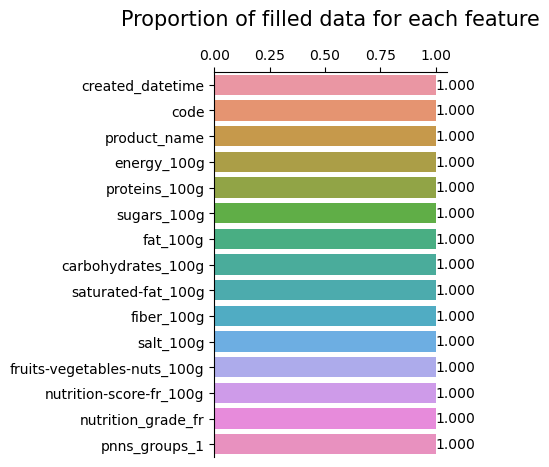

In [65]:
# Calculating proportion of filled data for each feature
actually_filled = 1-df.isna().mean().sort_values()

plt.figure(figsize=(3, 5))
ax = sns.barplot(y=actually_filled.index,
                 x=actually_filled.values)

container = ax.containers[0]
ax.bar_label(container,
             labels=[f'{x:.3f}' for x in container.datavalues])
#ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.tick_top()
plt.title('Proportion of filled data for each feature', fontsize=15, y=1.1)
plt.savefig('proportion2.png', transparent=True, bbox_inches='tight')
plt.show()